# Image processing

In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from sklearn.cluster import KMeans
import seaborn as sns
from numpy import linalg as la
from math import floor
import scipy.stats as st
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import imageio
plt.rcParams['figure.figsize'] = (20, 10)
def roundup(number):
    return round(number+.5)

In [4]:
#show whats on the current directory
os.listdir()

['IMG_7579.jpg',
 'Mexico_States.rar',
 'PHLITL_2000',
 'new_img.jpg',
 'imageWithPalette.jpg',
 'OsciladorArmónico.ipynb',
 'text_processing.ipynb',
 'panoramica_con_gradiente.png',
 'IMG_6846.JPG',
 '.DS_Store',
 'computing.ipynb',
 'weirdReshapes.jpeg',
 'IMG_0575.JPG',
 'panoramica2.jpg',
 'panoramica3.jpg',
 'panoramica1.jpg',
 'data_science.ipynb',
 'panoramica0.jpg',
 'texto.txt',
 'basic_but_not_standard.ipynb',
 'desaparecidos_municipio.html',
 'nuevaPies.jpg',
 'IMG_2453.jpeg',
 'README.md',
 '.gitignore',
 'imageReconWithPalette.jpg',
 'lineas.png',
 '.ipynb_checkpoints',
 '69593257_2380202072255491_9153782442694279168_n.jpg',
 '.git',
 'desaparecidas.png',
 'heatmap.png',
 'imageProcessing.ipynb',
 'IMG_0569.jpg',
 'axis.png']

In [4]:
img=misc.imread('69593257_2380202072255491_9153782442694279168_n.jpg')
# get some important details, sizex, sisey.
ysize=img.shape[0]
xsize=img.shape[1]
print(f'ysize: {ysize} and xsize {xsize}')
img=misc.imresize(img,(ysize//2,xsize//2))
ysize=img.shape[0]
xsize=img.shape[1]
print(f'ysize: {ysize} and xsize {xsize}')
plt.imshow(img)


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


ysize: 720 and xsize 540
ysize: 360 and xsize 270


In [8]:
4598-3742

856

In [5]:
img.shape

(3456, 4608, 3)

# save image

In [213]:

misc.imsave('cuadros.png', a)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


# rotate image and save

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


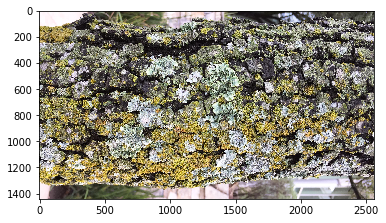

In [6]:

rotated = ndimage.rotate(img, -90)
misc.imsave('vuelta.png', rotated)
plt.imshow(rotated, cmap=plt.cm.gray)      

# weird reshapes

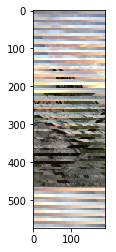

In [27]:

new_img=np.reshape(img,(xsize,ysize,3))
plt.imshow(new_img, cmap=plt.cm.gray)
#misc.imsave('weirdReshapes.jpeg',new_img)



# Slice experiments, try todo the horizontal ones.

In [28]:
def slice_image_r_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((maping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  



In [211]:
img.shape[0]


3456

In [29]:
def slice_image_r_n(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((maping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img


In [35]:
def slice_image_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    new_img=img
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((mapping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  
    return new_img



In [30]:
def slice_image_n(img,slices):
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((mapping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26]


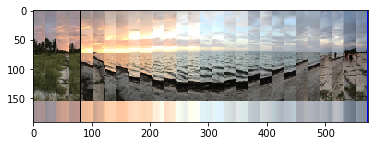

In [38]:
a=slice_image_n(img,int(xsize/20))

In [40]:
a=slice_image_m(a,int(ysize/20))

[1, 0, 3, 2, 5, 4, 7, 6, 9]


ValueError: could not broadcast input array from shape (0,574,3) into shape (21,574,3)

# Nueva funcion que cada slice la mueve derecha izquierda

# K means n color palette

(191, 574, 3)
<class 'numpy.ndarray'>


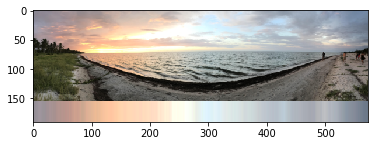

In [20]:
#def color_palette(img,n=4):
n=30
print(img.shape)
print(type(img))
new_img=np.reshape(img,(xsize*ysize,3))
model=KMeans(n_clusters=n,random_state=42).fit(new_img)#verbose=1
#sns.palplot(colors)
plt.imshow(img, cmap=plt.cm.gray) 
#return model

In [26]:
ysize

3742

## Mostrar colores por promedio vertical

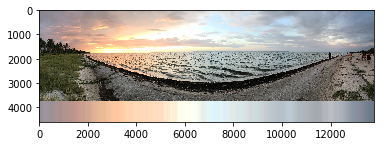

In [9]:
colors=[]
for i in range(xsize):
    colors.append(np.median(img[500:1600,i,:],axis=0))
    colors[i]=colors[i]/255
    #new_img[model.labels_==i]=colors[i]
colors=np.array(colors)
new_img=np.zeros((ysize+856,xsize,3))
for i in range(xsize):
    new_img[-856:ysize+856,i,:]=colors[i,:]
new_img[0:ysize,:,:]=img/255
plt.imshow(new_img)


In [10]:
misc.imsave(f'panoramica_con_gradiente.jpg', new_img)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


## Mostrar colores por k-means

(109634, 3)
[[0.2        0.19607843 0.1372549 ]
 [0.76862745 0.71372549 0.66666667]
 [0.46666667 0.44705882 0.42352941]
 [0.80784314 0.85098039 0.86666667]
 [0.4627451  0.49803922 0.53333333]
 [0.99607843 1.         0.95686275]
 [0.99607843 0.78039216 0.62352941]
 [0.35686275 0.34901961 0.3254902 ]
 [0.54117647 0.56078431 0.58431373]
 [0.58823529 0.62352941 0.65882353]
 [0.05490196 0.05490196 0.04313725]
 [0.80784314 0.63921569 0.55686275]
 [0.69019608 0.71372549 0.74117647]
 [0.85490196 0.83137255 0.80392157]
 [0.30980392 0.30196078 0.27058824]
 [0.8745098  0.94901961 0.97647059]
 [0.89803922 0.70980392 0.58431373]
 [1.         0.85098039 0.72941176]
 [0.71764706 0.58823529 0.55686275]
 [0.1254902  0.12156863 0.09019608]
 [0.54117647 0.50980392 0.47843137]
 [0.62745098 0.57254902 0.58039216]
 [0.64313725 0.67058824 0.70588235]
 [0.47058824 0.5372549  0.63529412]
 [0.7372549  0.77647059 0.8       ]
 [0.88235294 0.90196078 0.90588235]
 [0.2627451  0.2627451  0.17254902]
 [1.         0.9

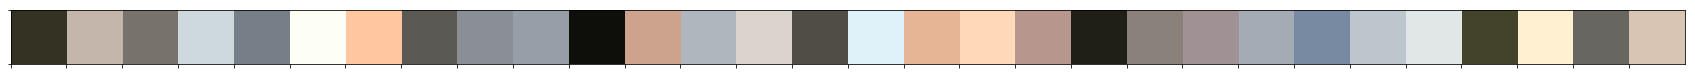

In [21]:
colors=[]
print(new_img.shape)
for i in range(n):
    colors.append((np.median(new_img[model.labels_==i],axis=0)))
    colors[i]=colors[i]/255
    #new_img[model.labels_==i]=colors[i]
colors=np.array(colors)
#It could be scaled automatically by an optimizer.
#for i in range(n):
    #colors[i]=colors[i]/max(colors[i])
sns.palplot(colors)
print(colors)

[0.31190649 1.24283413 0.77266845 1.45872865 0.86407206 1.70521511
 1.41066406 0.59591071 0.97405008 1.08113742 0.08882158 1.17102662
 1.23899849 1.43816813 0.51027128 1.61830171 1.28519204 1.50206829
 1.08218953 0.19662668 0.88412023 1.02876731 1.16686932 0.95587381
 1.33658197 1.55328774 0.40968663 1.5992405  0.68415359 1.34880299]


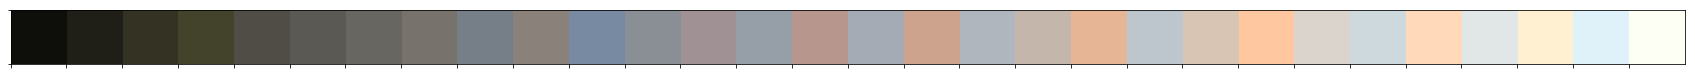

In [22]:
new_colors=np.array(colors)
normas=la.norm(colors,axis=1)
print(normas)
map_id=np.argsort(normas).astype(int)
new_colors[:,0]=new_colors[map_id,0]
new_colors[:,1]=new_colors[map_id,1]
new_colors[:,2]=new_colors[map_id,2]
sns.palplot(new_colors)

# nueva imagen

In [23]:
# clusters from image.
def nueva_imagen():
    new_img=np.zeros((xsize*ysize,3))
    for i in range(n):
        slicer=model.labels_==i
        new_img[slicer]=colors[i]
    new_img=np.reshape(new_img,(ysize,xsize,3))
    plt.imshow(new_img)
    return new_img


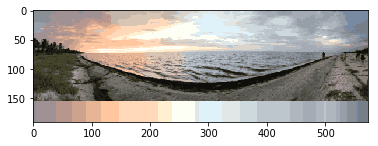

In [24]:
new_img=nueva_imagen()

In [25]:
misc.imsave(f'imageReconWithPalette.jpg', new_img)



/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.


# nueva imagen con la paleta integrada abajo

In [17]:
print(new_img.shape)
print(ysize)
new_img=np.zeros((xsize,xsize,3))
slicer=(slice(0, ysize, 1), slice(0,xsize, 1),slice(0, 3, 1))
new_img[slicer]=img/255

for i in range(n):
    slicer=((slice(ysize, xsize, 1), slice(floor(i*xsize/n),floor((i+1)*xsize/n), 1),slice(0, 3, 1)))
    new_img[slicer]=colors[i]
misc.imsave(f'imageWithPalette.jpg', new_img)
plt.imshow(new_img)

(720, 540, 3)
720


ValueError: could not broadcast input array from shape (720,540,3) into shape (540,540,3)

# Nueva imagen con paleta vertical

(720, 720, 3)
4032


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


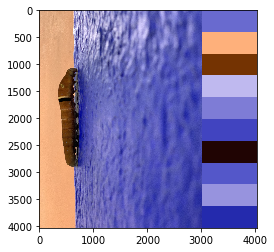

In [20]:
print(new_img.shape)
print(ysize)
new_img=np.zeros((ysize,ysize,3))
slicer=(slice(0, ysize, 1), slice(0,xsize, 1),slice(0, 3, 1))
new_img[slicer]=img/255

for i in range(n):
    slicer=((slice(floor(i*ysize/n),floor((i+1)*ysize/n), 1), slice(xsize, ysize, 1),slice(0, 3, 1)))
    new_img[slicer]=colors[i]
plt.imshow(new_img)
misc.imsave(f'imageWithPalette.jpg', new_img)



## RGB exploration

In [1]:
def f(x,y,z):
    sns.palplot([x/256,y/256,z/256])
    return (x,y,z)
interact(f, x=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False),y=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False),z=widgets.IntSlider(min=0, max=255, step=1, value=0,continuous_update=False));


NameError: name 'interact' is not defined

## clusters a partir de (R,G,B,x,y)

## cut in squares a panoramic image.


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  import sys
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


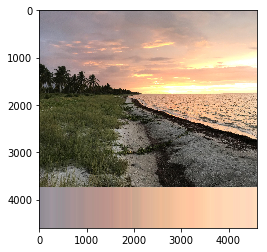

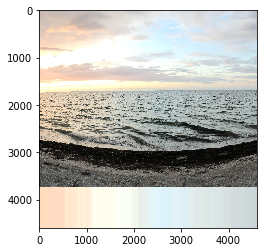

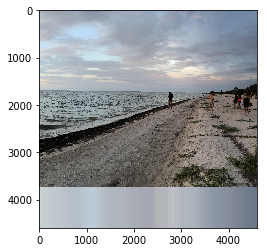

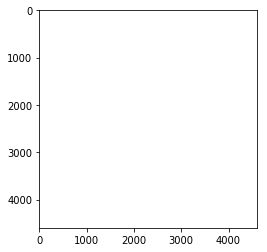

In [13]:
for i in range(floor(xsize/ysize)):
    new_img=np.ndarray(shape=(ysize,ysize,3), dtype=int, order='F')
    slicer=(slice(0, ysize, 1), slice(i*ysize,(i+1)*ysize, 1), slice(0, 3, 1))
    new_img=img[slicer]
    plt.figure(i)
    plt.imshow(new_img, cmap=plt.cm.gray)
    misc.imsave(f'panoramica{i}.jpg', new_img)


new_img=np.ones((ysize,ysize,3),dtype=int)*255
slicer1=(slice(0, ysize, 1), slice((i+1)*ysize,xsize, 1), slice(0, 3, 1))
slicer2=(slice(0, ysize, 1), slice(0,xsize%ysize, 1), slice(0, 3, 1))
new_img[slicer2]=img[slicer1]
plt.figure(i+1)
plt.imshow(new_img, cmap=plt.cm.gray)
misc.imsave(f'panoramica{i+1}.jpg', new_img) 

# visualize 2d gaussian filter.

In [27]:
#From https://stackoverflow.com/users/4527807/teddy-hartanto answer
from scipy import signal

def gkern(kernlen=100, std1=3,std2=4):
    """Returns a 2D Gaussian kernel array."""
    gkern1d1= signal.gaussian(kernlen, std=std1).reshape(kernlen, 1)
    gkern1d2= signal.gaussian(kernlen, std=std2).reshape(kernlen, 1)


    #print(gkern1d)
    gkern2d = np.outer(gkern1d1, gkern1d2)
    return gkern2d

In [30]:
def f(res,std1,std2):
    kern=gkern(res,std1,std2)
    #kern=np.array((-gkern(res,std1,std2),gkern(res,std1,std2)))
    #print(kern)
    #np.squeeze(kern,axis=2)
    
    sns.heatmap(kern,cmap='viridis')
    return (res,std1,std2)
interact(f, res=IntSlider(min=1, max=1000, step=1, value=10,continuous_update=False),std1=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),std2=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='res', max=1000, min=1), IntSli…

In [42]:
import os
def create_gif(source):
    dirs=os.listdir(source)
    images=[]
    dirs.sort()
    for image in dirs:
        if(image.endswith('.png')):
            print(image)
            image=imageio.imread(f'{source}/{image}')
            images.append(image)
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave(f'{source}/result.gif', images, fps=1)

In [43]:
create_gif('../../Downloads/fotosvilli')

ISTUV_mapa2014.png
ISTUV_mapa2015.png
ISTUV_mapa2016.png
ISTUV_mapa2017.png
ISTUV_mapa2018.png


## PCA from image:

In [205]:
img.shape

(48, 60, 3)

In [207]:
new_img=img.reshape((48*60,3))

In [209]:
import seaborn as sns

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()

X=new_img
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
pca.explained_variance_

array([7882.15540966, 4055.27170337,   91.40889062])

In [211]:
principalComponents.shape

(2880, 3)

In [212]:
plt.rcParams['figure.figsize'] = (20, 10)

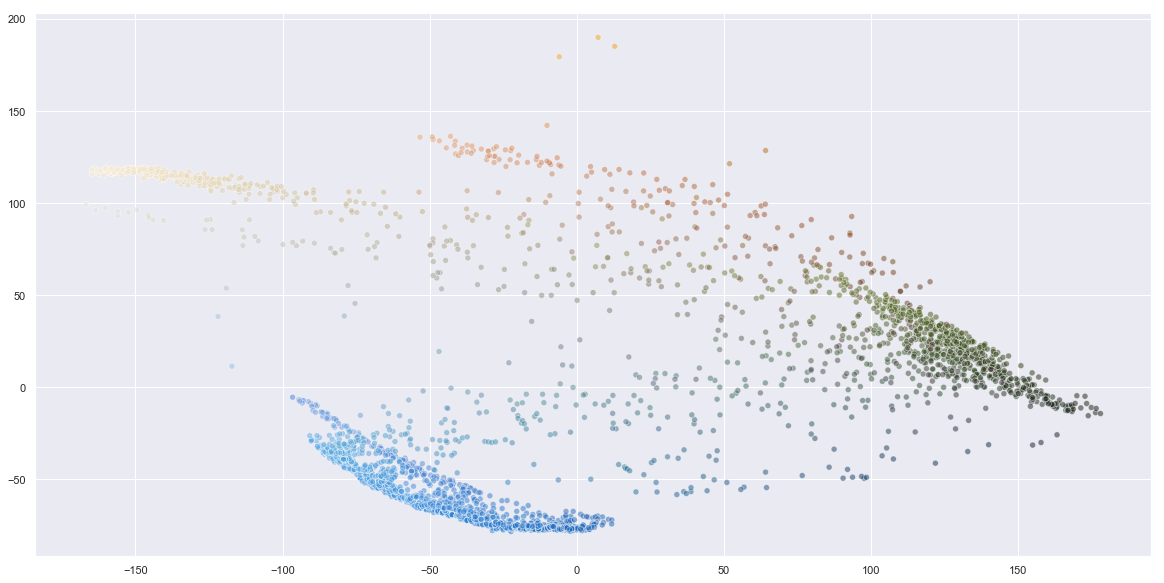

In [213]:
sns.scatterplot(principalComponents[:,0],principalComponents[:,1],c=X/255,alpha=.5)

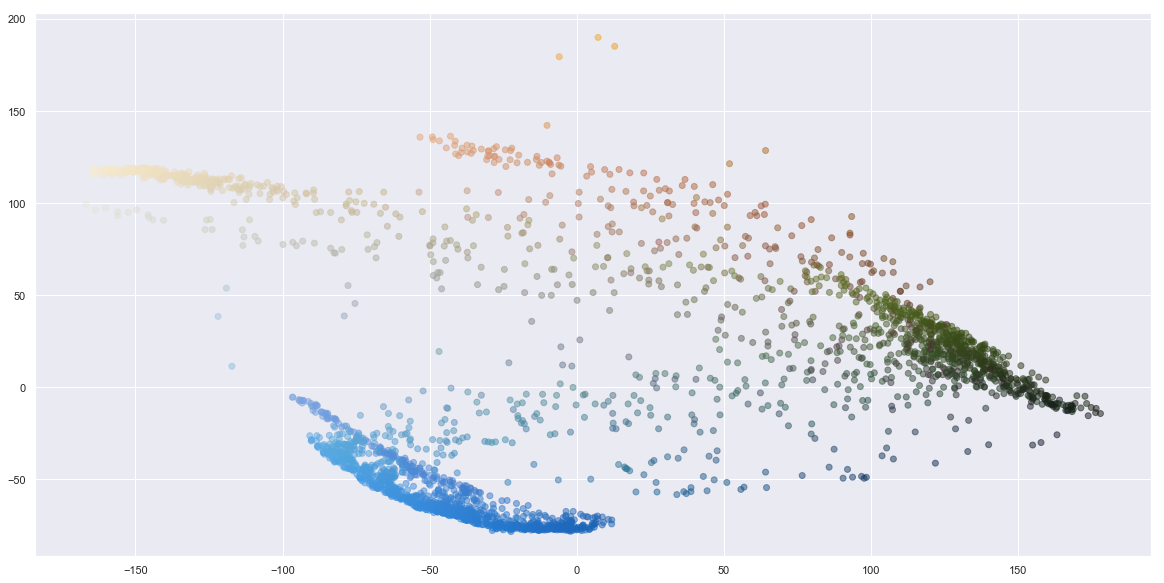

In [214]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=new_img/255,alpha=.5)

# scatter image

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
img=misc.imread('69593257_2380202072255491_9153782442694279168_n.jpg')

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [9]:
img=misc.imread('valemancia.jpg')
img=misc.imresize(img,(img.shape[0]//20,img.shape[1]//20))
X=np.linspace(1,img.shape[0],img.shape[1])
Y=np.linspace(1,img.shape[1],img.shape[0])
mesh=np.meshgrid(X,Y)
nodes = np.array(list(zip(*(dim.flat for dim in mesh))))
new_img=img.reshape((img.shape[1]*img.shape[0],3))

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [10]:
sizes=np.random.random(img.shape[1]*img.shape[0])

In [11]:
sizes

array([0.27109259, 0.02991377, 0.64288206, ..., 0.30705988, 0.00113659,
       0.57581823])

In [12]:
indices=list(range(img.shape[1]*img.shape[0]))

In [20]:
from random import sample
l=sample(indices,2500)


In [14]:
%matplotlib inline

ValueError: Invalid RGBA argument: 0.34901960784313724

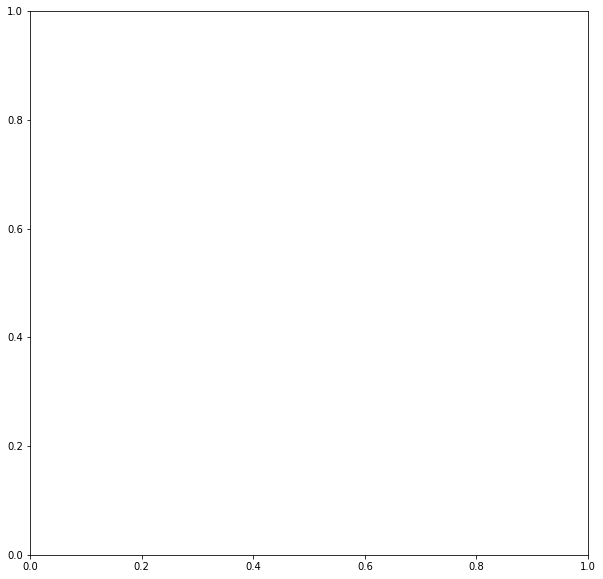

In [49]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(nodes[l,0],nodes[l,1],edgecolors=new_img[::-1][l,0]/255,s=sizes[l]*100,alpha=.5,cmap='Reds',facecolors='none')

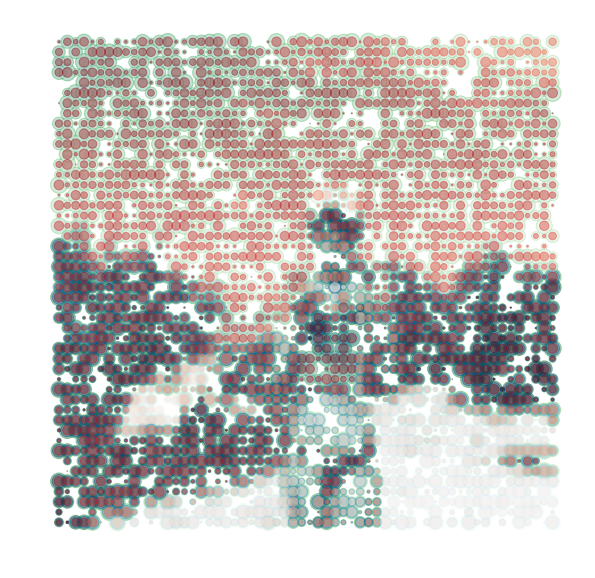

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
fig,ax=plt.subplots()
plt.scatter(nodes[l,0],nodes[l,1],c=new_img[::-1][l,1]/255,s=sizes[l]*300,alpha=.4,cmap='Greens_r')
plt.scatter(nodes[l,0],nodes[l,1],c=new_img[::-1][l,2]/255,s=sizes[l]*200,alpha=.4,cmap='Blues_r')
plt.scatter(nodes[l,0],nodes[l,1],c=new_img[::-1][l,0]/255,s=sizes[l]*100,alpha=.4,cmap='Reds_r')
ax.axis('off')
fig.savefig('valemancia.png',transparent=True)

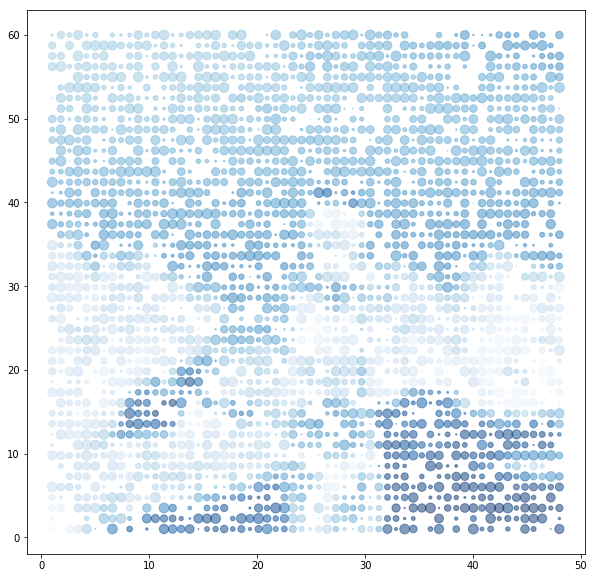

In [31]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(nodes[l,0],nodes[l,1],c=new_img[::-1][l,1]/255,s=sizes[l]*100,alpha=.5,cmap='Blues')

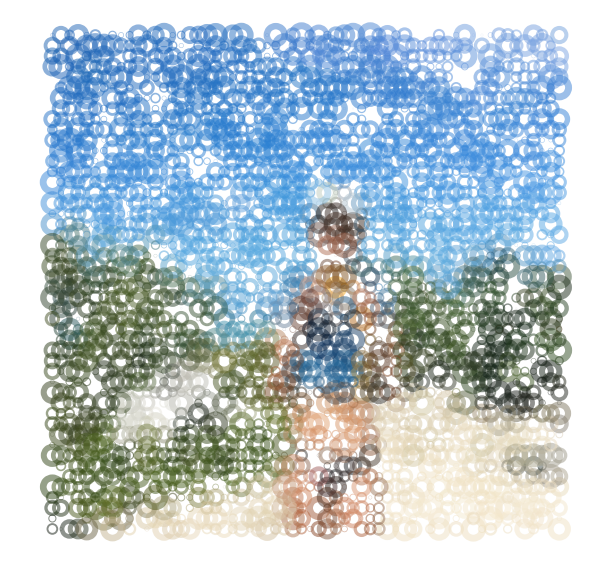

In [67]:
fig,ax=plt.subplots()
plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(nodes[l,0],nodes[l,1],edgecolors=new_img[::-1][l]/255,s=sizes[l]*350,alpha=.5,facecolors='none',linewidths=sizes[l]*7)
ax.axis('off')
fig.savefig('valemancia.png',transparent=True)
plt.show()

In [39]:
from matplotlib import patches
patches.Circle((nodes[l,0],nodes[l,1]),c=new_img[::-1][l]/255,s=sizes[l]*350,alpha=.5,)

AttributeError: Unknown property c

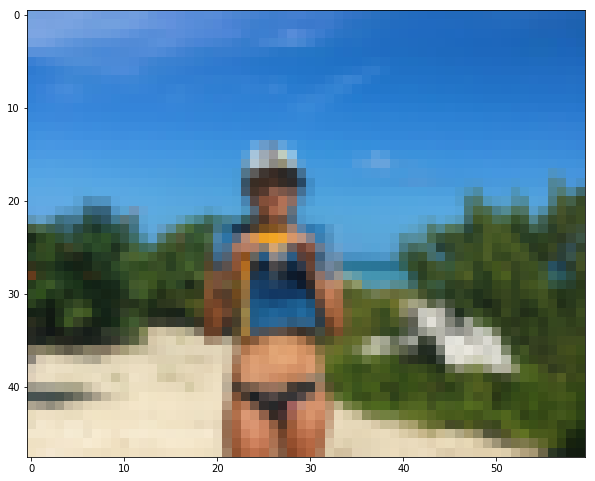

In [25]:
plt.imshow(img)

In [196]:
%matplotlib inline

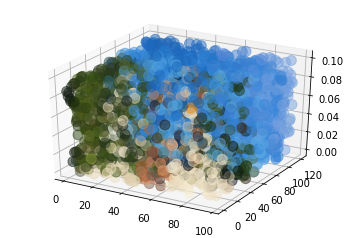

In [197]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(nodes[l,0],nodes[l,1],np.random.random(len(l))/10,c=new_img[::-1][l]/255,alpha=.5,s=100);
plt.rcParams['figure.figsize'] = (20, 20)

# RGB cube

In [1]:
%matplotlib qt

In [5]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
z = np.linspace(0, 1, 20)
mesh = np.meshgrid(x, y, z)
nodes = np.array(list(zip(*(dim.flat for dim in mesh))))
X=nodes

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=X,alpha =.5);
ax.axis('off')
plt.rcParams['figure.figsize'] = (20, 20)